In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

# 準備和整理數據

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston_datasets = load_boston()

In [40]:
# print(boston_datasets.DESCR)

In [41]:
X = pd.DataFrame(boston_datasets.data, columns = boston_datasets.feature_names)
Y = boston_datasets.target

In [42]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# Principal Component Analysis

In [43]:
from sklearn.decomposition import PCA

In [44]:
X_pca = PCA(n_components=2)
reduced_data_X_pca = X_pca.fit_transform(X)
print('reduced_data_X_pca.shape :', reduced_data_X_pca.shape)
print('reduced_data_X_pca :')
print(reduced_data_X_pca)

reduced_data_X_pca.shape : (506, 2)
reduced_data_X_pca :
[[-119.81884272   -5.56005586]
 [-168.89015548   10.11620863]
 [-169.31170747   14.0805323 ]
 ...
 [-138.38716306    0.9380922 ]
 [-137.50517338    4.2518251 ]
 [-139.19033295    1.00906423]]


# 迴歸機

In [45]:
from sklearn.model_selection  import train_test_split

In [46]:
Y = boston.MEDV

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [48]:
from sklearn.linear_model  import LinearRegression

In [49]:
model = LinearRegression(normalize = True)   # Normalize

In [50]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [51]:
y_predict = model.predict(x_test)

In [52]:
sns.set()

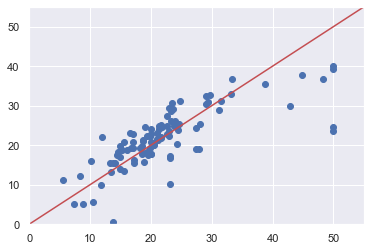

In [53]:
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0, 55], [0, 55], 'r')

In [54]:
print('相對誤差: {:.5%}'.format(((y_predict - y_test)/(y_test)).mean()))

相對誤差: 2.99629%


# 相較去掉 ['CHAS'], ['DIS'] 所預測的

In [55]:
X.drop(['CHAS', 'DIS'], axis = 1, inplace = True)

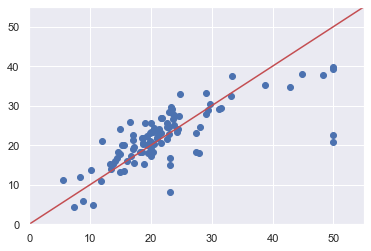

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
model = LinearRegression(normalize = True)   # Normalize
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
sns.set()
plt.scatter(y_test, y_predict)
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.plot([0, 55], [0, 55], 'r')

In [57]:
print('相對誤差: {:.5%}'.format(((y_predict - y_test)/(y_test)).mean()))

相對誤差: 3.50271%
